# PRÁCTICA
* Agrupa las observaciones de la tabla descargada mediante el algoritmo de K-Medias sin realizar ningún tipo de transformación de los datos originales. Para dicho efecto, determina el número óptimo de clusters tanto por el criterio del gráfico de codo así como por el indicador Silhouette.

* Repite el ejercicio anterior después de haber transformado tus datos originales a dos columnas, mediante reducción por PCA. 

* Gráfica los grupos obtenidos considerando las dos dimensiones resultantes.

* Compara los resultados de los incisos 2) y 3). ¿Obtuviste los mismos resultados de agrupamiento? Comenta sobre la ventaja práctica de haber efectuado la transformación por PCA antes de aplicar el algoritmo K-Medias.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.cluster import KMeans 

In [4]:
dataset = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M27 DS/iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
fields = dataset.iloc[:,[2,3]].values
fields

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    kmeans.fit(fields)
    wcss.append(kmeans.inertia_)

* GRAFICO DE CODO

Text(0, 0.5, 'WCSS')

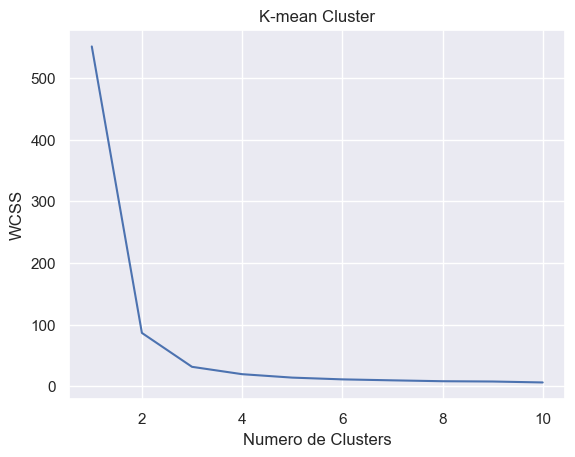

In [12]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('K-mean Cluster')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')

### El número de cluster optimo según la grafica de CODO es de 3

In [15]:
# clasificación de grupos

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


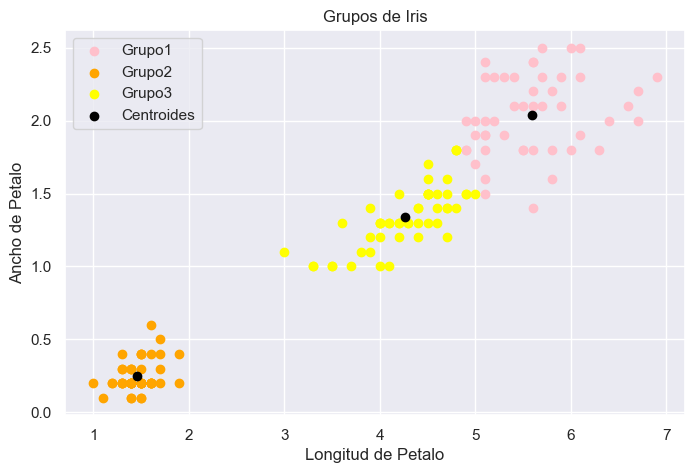

In [17]:
# grtaficamos decuardo a los grupos generados

plt.figure(figsize = (8,5))
plt.scatter(fields[cluster_values == 0, 0], fields[cluster_values == 0, 1], c = 'pink', label = 'Grupo1')
plt.scatter(fields[cluster_values == 1, 0], fields[cluster_values == 1, 1], c = 'orange', label = 'Grupo2')
plt.scatter(fields[cluster_values == 2, 0], fields[cluster_values == 2, 1], c = 'yellow', label = 'Grupo3')

# visualizamos centriodes

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')
plt.title('Grupos de Iris')
plt.xlabel('Longitud de Petalo')
plt.ylabel('Ancho de Petalo')
plt.legend()

* Utilzamos el criterio de Silueta

In [19]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [21]:
X = dataset.iloc[:,[2, 3]].to_numpy()
for j in range(2,12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    print('Score Silhouette:', 'k =', j, ':', score)

Score Silhouette: k = 2 : 0.7653904101383076
Score Silhouette: k = 3 : 0.6604800085022658
Score Silhouette: k = 4 : 0.6127580795614039
Score Silhouette: k = 5 : 0.588373271407563
Score Silhouette: k = 6 : 0.5617282187055354
Score Silhouette: k = 7 : 0.5549940910739419
Score Silhouette: k = 8 : 0.5245973296356812
Score Silhouette: k = 9 : 0.5297498184921089
Score Silhouette: k = 10 : 0.5174205026033651
Score Silhouette: k = 11 : 0.5134138267091934


* Este valor 'Score Silhouette: k = 3 : 0.6604800085022658' es el mas cercano al 1, lo que indica una mejor agrupación, el resultado indica que son 3 clusters el valor optimo lo que confirma con el mismo resultado del algoritmo kmeans(3 clusters valor optimo)

In [22]:
# algoritmo KMeans aplicado a los valores originales de la BD riginal, bajo la transformación de PCA

fields2 = dataset.iloc[:, [0,1,2,3]].values
fields2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
# plicamos PCA

from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [25]:
wcss2 = []
for index in range(2,12):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS2')

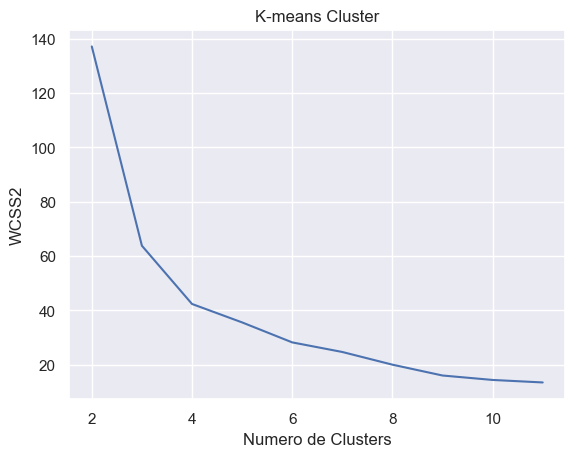

In [27]:
# grafico de CODO

sns.set()
plt.plot(range(2,12), wcss2)
plt.title('K-means Cluster')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS2')

* Numero de clusters optimo = 3

In [29]:
# clasificación por grupos

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
cluster_values = kmeans.fit_predict(fields2)
cluster_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

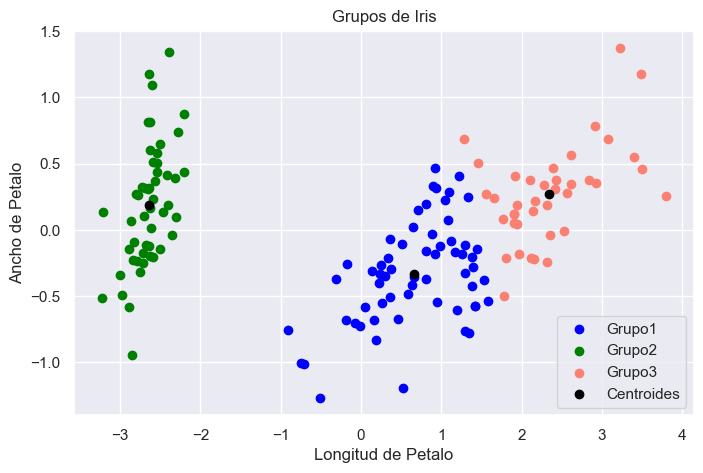

In [33]:
# graficamos de cauerdo a los grupos

plt.figure(figsize= (8,5))
plt.scatter(fields2[cluster_values == 0, 0], fields2[cluster_values == 0, 1], c = 'blue', label = 'Grupo1')
plt.scatter(fields2[cluster_values == 1, 0], fields2[cluster_values == 1, 1], c = 'green', label = 'Grupo2')
plt.scatter(fields2[cluster_values == 2, 0], fields2[cluster_values == 2, 1], c = 'salmon', label = 'Grupo3')

# visualizamos los centroides

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'black', label = 'Centroides')
plt.title('Grupos de Iris')
plt.xlabel('Longitud de Petalo')
plt.ylabel('Ancho de Petalo')
plt.legend()

### En conclución
* Se obtuvieron los mimos resultados en este ejercicio, en cuanto usar el algoritmo KMeans sin transformar y utilizando PCA